In [415]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics 

Importing the Boston House Price Prediction

So, this delimiter suggests that the values in each row are separated by one or more whitespace characters.
If header is set to None, it usually means that the data file doesn't have a header row. If it were set to a specific value (e.g., header=0), it would indicate the row number that contains the header.

In [416]:
'''
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population

'''

'\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\n\n'

In [417]:
#  Collection of Data

In [418]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_data = pd.read_csv('housing.csv', header=None)
house_data.head(5)

,0
0,0.00632 18.00 2.310 0 0.5380 6.5750 65...
1,0.02731 0.00 7.070 0 0.4690 6.4210 78...
2,0.02729 0.00 7.070 0 0.4690 7.1850 61...
3,0.03237 0.00 2.180 0 0.4580 6.9980 45...
4,0.06905 0.00 2.180 0 0.4580 7.1470 54...


In [419]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house_data = pd.read_csv('housing.csv', header=None,delimiter=r'\s+',names=column_names)
house_data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [420]:
house_data.rename(columns={'MEDV':'PRICE'},inplace=True)
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [421]:
# Data analysis #

In [422]:
house_data.shape

(506, 14)

In [423]:
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

Statistical Measures of the dataset

In [424]:
#house_data.describe ---  house_data.describe() 
#The parentheses () are used to invoke the method

house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


UnderStanding the Correlation between variouse features in the dataset

Correlation in machine learning is a statistical measure that describes the extent to which two variables change together.

In [425]:
# Data Preprocessing #

In [426]:
cor=house_data.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [427]:
'''
sns.heatmap(
    cor,          # Assuming 'cor' is your data (a 2D array or DataFrame)
    cbar=True,    # Draw a colorbar
    fmt='.1f',    # Format for the annotation text (one decimal place)
    square=True,  # Set the Axes aspect to "equal"
    annot=True,   # Display data values in each cell
    annot_kws={'size': 10},  # Keyword arguments for the annotation text (font size)
    cmap='Blues'  # Colormap (shades of blue)
)
'''

'\nsns.heatmap(\n    cor,          # Assuming \'cor\' is your data (a 2D array or DataFrame)\n    cbar=True,    # Draw a colorbar\n    fmt=\'.1f\',    # Format for the annotation text (one decimal place)\n    square=True,  # Set the Axes aspect to "equal"\n    annot=True,   # Display data values in each cell\n    annot_kws={\'size\': 10},  # Keyword arguments for the annotation text (font size)\n    cmap=\'Blues\'  # Colormap (shades of blue)\n)\n'

<Axes: >

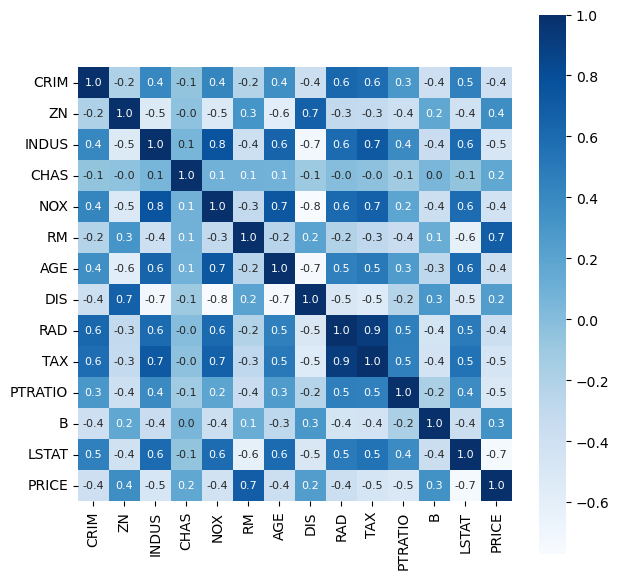

In [428]:
plt.figure(figsize=(7,7))
sns.heatmap(cor,cbar=True,fmt='.1f',square=True,annot=True,annot_kws={'size':8},cmap='Blues',linecolor="red")

In [429]:
x=house_data.drop(['PRICE'],axis=1)
y=house_data['PRICE']

In [430]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [431]:
# Train and Test Dataset Split #

In [432]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [433]:
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)


(506, 13) (404, 13) (102, 13)
(506,) (404,) (102,)


In [434]:
# Train the Model #

In [435]:
model=XGBRegressor(learning_rate=0.1,max_depth=6,n_estimators=3)
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=3, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [436]:
predicted=model.predict(x_train)
predicted

array([22.898306, 21.878199, 21.901031, 25.21225 , 20.691643, 20.210201,
       22.087902, 21.064892, 20.710201, 22.31192 , 20.338776, 19.089106,
       23.3512  , 28.772812, 25.21225 , 21.863436, 21.878199, 21.710398,
       25.21225 , 21.896862, 22.898306, 19.089106, 28.81728 , 22.278494,
       22.349852, 21.71528 , 21.984974, 22.898306, 22.340548, 25.21225 ,
       21.710398, 19.089106, 21.661266, 22.625687, 19.574198, 19.089106,
       20.210201, 22.562296, 21.551659, 20.210201, 22.898306, 22.983763,
       20.210201, 20.960438, 20.707546, 20.438751, 23.3512  , 21.056665,
       28.81728 , 21.477007, 22.278494, 25.21225 , 20.960438, 22.898306,
       21.863436, 21.878199, 22.22151 , 25.21225 , 24.717152, 25.21225 ,
       21.71528 , 28.81728 , 20.456179, 19.089106, 22.898306, 19.089106,
       23.3512  , 21.414011, 22.314617, 28.81728 , 28.81728 , 25.670408,
       22.898306, 25.21225 , 23.163605, 28.81728 , 20.210201, 21.477007,
       21.878199, 22.898306, 28.772812, 23.3512  , 

In [437]:
# R Squared Error 
score1=metrics.r2_score(y_train,predicted)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_train,predicted)

print("R Squared Error : ",score1)
print("Mean Absolute Error : ",score2)

R Squared Error :  0.4150019984579658
Mean Absolute Error :  5.037101553926373


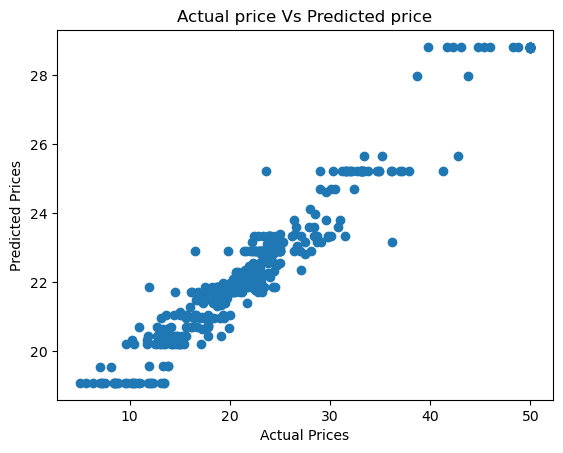

In [438]:
plt.scatter(y_train,predicted)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price Vs Predicted price")
plt.show()

In [439]:
tested=model.predict(x_test)

In [442]:
score1=metrics.r2_score(y_test,tested)
# Mean Absolute Error
score2=metrics.mean_absolute_error(y_test,tested)

print("R Squared Error : ",score1)
print("Mean Absolute Error : ",score2)

R Squared Error :  0.4142202316486341
Mean Absolute Error :  5.266213312336042


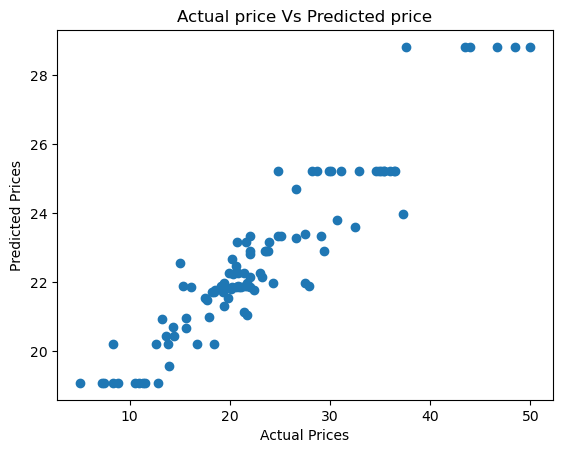

In [441]:
plt.scatter(y_test,tested)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual price Vs Predicted price")
plt.show()